**🌟 Подробное описание программы на русском языке**

**📌 Что делает программа ZetaVision™?**

Программа ZetaVision™ создаёт красочную и плавную анимацию, которая показывает, как строится график модуля дзета-функции Римана на критической прямой (Re = 0.5) вместе с так называемым Имединым фильтром — специальной затухающей осцилляцией, которая помогает визуально сопоставлять осцилляции дзета-функции и её нули.

Программа:

✅ последовательно «рисует» график от начала до конца, чтобы было видно процесс появления кривых;

✅ отмечает на графике первые 5 известных нетривиальных нулей дзета-функции Римана (красными линиями с подписями);

✅ сохраняет результат в виде видеофайла .mp4 (продолжительностью 5 минут), которое можно использовать для научных презентаций, лекций, публикаций в интернете и т.д.


**📌 Как работает программа?**

1️⃣ Программа создаёт диапазон значений t от 0.1 до 50.

2️⃣ Для этих значений вычисляется модуль дзета-функции Римана (|ζ(1/2 + it)|).

3️⃣ Вычисляется Имедин фильтр: это затухающая синусоида вида sin(ωt) * exp(-αt).

4️⃣ График строится пошагово (анимированно), показывая, как растут кривые.

5️⃣ На графике автоматически отмечаются известные нули функции ζ.

6️⃣ Итоговое видео длительностью 5 минут сохраняется как zeta_imeda_animation.mp4.




**💻Шаг 1. Установка библиотек (выполнить в командной строке один раз):**

**💻 Шаг 2. Установка FFmpeg (для создания видео):**

**💻 Шаг 3. Скопируйте код программы в свой Python-редактор (Jupyter Notebook, VSCode, PyCharm).**

**💻 Шаг 4. Запустите код.**


✅ Видео успешно сохранено как zeta_imeda_animation.mp4


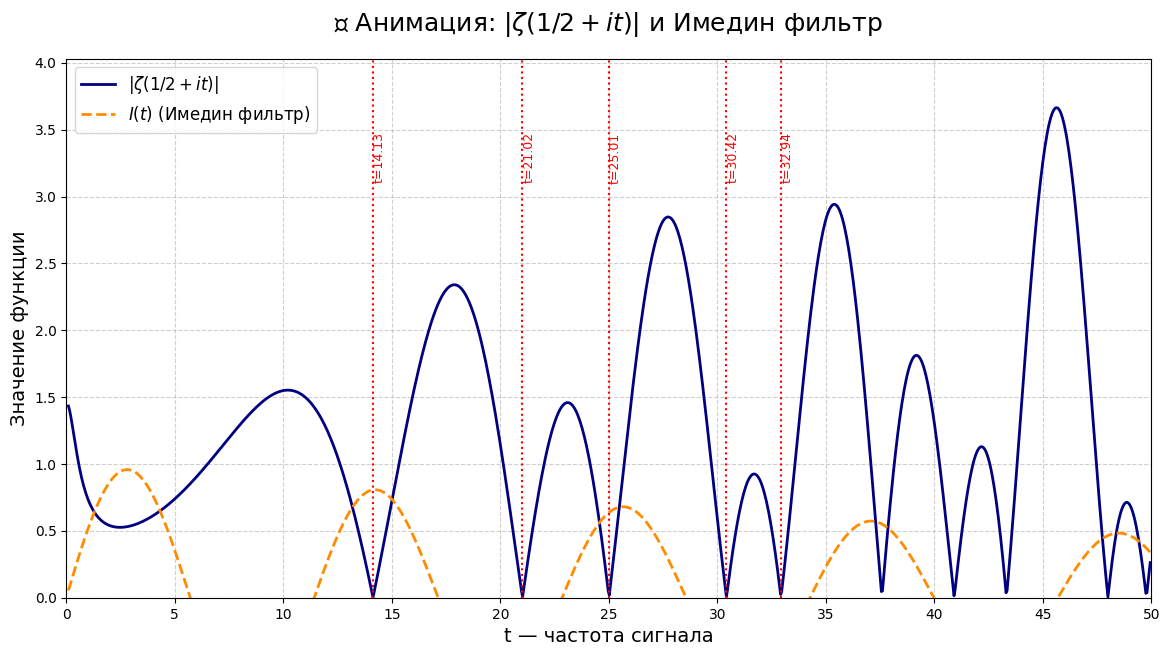

In [6]:
!pip install matplotlib numpy mpmath

# 📦 Установка необходимых библиотек (выполнить в терминале при первом запуске)
# !pip install matplotlib numpy mpmath

import matplotlib.pyplot as plt
import numpy as np
from mpmath import zeta, zetazero
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation, FFMpegWriter

# 📊 Формируем диапазон значений t
t_values = np.linspace(0.1, 50, 1000)

# 📈 Вычисляем модуль дзета-функции Римана на критической прямой (Re = 0.5)
zeta_mod = np.array([abs(zeta(0.5 + 1j * t)) for t in t_values])
max_value = float(zeta_mod.max())  # Преобразуем в float для корректной работы с Matplotlib

# 🔶 Определяем Имедин фильтр (затухающая осцилляция)
def imeda_filter(t, omega=0.55, alpha=0.015):
    """
    Имедин фильтр: затухающая синусоида для моделирования осцилляций
    """
    return np.sin(omega * t) * np.exp(-alpha * t)

I_t = imeda_filter(t_values)

# 🎯 Известные нули дзета-функции (первые 5)
known_zeros = [float(zetazero(n).imag) for n in range(1, 6)]

# 🎥 Подготовка графика для анимации
fig, ax = plt.subplots(figsize=(14, 7))
line_zeta, = ax.plot([], [], color="navy", linewidth=2, label=r"$|\zeta(1/2 + it)|$")
line_I, = ax.plot([], [], color="darkorange", linestyle="--", linewidth=2, label=r"$I(t)$ (Имедин фильтр)")

# Отмечаем нули
for z in known_zeros:
    ax.axvline(x=z, color="red", linestyle=":", linewidth=1.5)
    ax.text(z + 0.3, max_value * 0.95, f"t={z:.2f}", rotation=90,
            color="red", fontsize=9, ha='center', va='top')

# Настройка осей
ax.set_xlim(0, 50)
ax.set_ylim(0, max_value * 1.1)
ax.set_xlabel("t — частота сигнала", fontsize=14)
ax.set_ylabel("Значение функции", fontsize=14)
ax.set_title("🌌 Анимация: $|\zeta(1/2 + it)|$ и Имедин фильтр", fontsize=18, pad=20)
ax.legend(fontsize=12)
ax.grid(True, linestyle="--", alpha=0.6)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MaxNLocator(10))

# Функция обновления кадров
def update(frame):
    x = t_values[:frame]
    y1 = zeta_mod[:frame]
    y2 = I_t[:frame]
    line_zeta.set_data(x, y1)
    line_I.set_data(x, y2)
    return line_zeta, line_I

# Создание анимации
frames_total = len(t_values)
fps = frames_total / (5 * 60)  # Кадров в секунду для 5-минутного видео
ani = FuncAnimation(fig, update, frames=frames_total, blit=True)

# Сохранение в MP4
writer = FFMpegWriter(fps=fps, metadata=dict(artist='Имеда Шерифадзе'), bitrate=1800)
ani.save("zeta_imeda_animation.mp4", writer=writer)

print("✅ Видео успешно сохранено как zeta_imeda_animation.mp4")


**📌 Для кого эта программа?**

ZetaVision™ подходит:

1. для школьников и студентов, изучающих математику;

2. для учёных и преподавателей, чтобы наглядно показывать поведение дзета-функции;

3. для популяризаторов науки, создающих образовательный контент;

4. для всех любознательных людей, интересующихся загадками чисел и гипотезой Римана.

**🌟 Итог**

ZetaVision™ делает сложную математику красивой и понятной.
Она превращает статический график в живое, развивающееся изображение, которое можно использовать для обучения, исследования или просто для эстетического удовольствия от математики!

